In [1]:
#1.Load And Inspect Data

import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

print(df.shape)
print(df.info())
df.head(5)


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#2. Column summary

summary = pd.DataFrame({
    "Column": df.columns,
    "dtype": df.dtypes.values,
    "Missing": df.isnull().sum().values,
    "Unique": df.nunique().values
})
summary.sort_values("Missing", ascending=False)




,Column,dtype,Missing,Unique
10,Cabin,object,687,147
5,Age,float64,177,88
11,Embarked,object,2,3
0,PassengerId,int64,0,891
3,Name,object,0,891
2,Pclass,int64,0,3
1,Survived,int64,0,2
4,Sex,object,0,2
7,Parch,int64,0,7
6,SibSp,int64,0,7


In [3]:
#3. Value counts & proportions
for col in ["Pclass", "Sex", "Embarked"]:
    vc = df[col].value_counts(dropna=False)
    prop = df[col].value_counts(normalize=True, dropna=False) * 100
    print(f"\n{col}:")
    print(pd.DataFrame({"Count": vc, "Percentage": prop.round(2)}))



Pclass:
        Count  Percentage
Pclass                   
3         491       55.11
1         216       24.24
2         184       20.65

Sex:
        Count  Percentage
Sex                      
male      577       64.76
female    314       35.24

Embarked:
          Count  Percentage
Embarked                   
S           644       72.28
C           168       18.86
Q            77        8.64
NaN           2        0.22


In [4]:
#4. Select & filter

female_firstclass_over_30 = df[(df["Sex"] == "female") & 
                               (df["Pclass"] == 1) & 
                               (df["Age"] > 30)]
female_firstclass_over_30.sort_values("Fare", ascending=False).head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


In [5]:
#5. Basic aggregations

print("Age mean:", df["Age"].mean(skipna=True))
print("Age median:", df["Age"].median(skipna=True))
print("Age mode:", df["Age"].mode()[0])

print("\nMean Fare per Pclass:")
print(df.groupby("Pclass")["Fare"].mean())

print("\nOverall survival rate:", df["Survived"].mean())
print("\nSurvival rate by Gender:")
print(df.groupby("Sex")["Survived"].mean())


Age mean: 29.69911764705882
Age median: 28.0
Age mode: 24.0

Mean Fare per Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Overall survival rate: 0.3838383838383838

Survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [6]:
#6. Missing value imputation (Age)

df["Age_imputed"] = df["Age"]

medians = df.groupby(["Pclass", "Sex"])["Age"].median()

for (pclass, sex), median in medians.items():
    df.loc[(df["Age_imputed"].isna()) & 
           (df["Pclass"] == pclass) & 
           (df["Sex"] == sex), "Age_imputed"] = median

print("Missing before:", df["Age"].isna().sum())
print("Missing after:", df["Age_imputed"].isna().sum())


Missing before: 177
Missing after: 0


In [7]:
#7. Feature extraction from text (Title)

df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")

df["Title"].value_counts()


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [8]:
#8. Family size & IsAlone

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = df["FamilySize"] == 1

df.groupby("IsAlone")["Survived"].mean()

IsAlone
False    0.505650
True     0.303538
Name: Survived, dtype: float64

In [9]:
#9. Pivot table & multi-index groupby

pd.pivot_table(df, values="Survived", index="Pclass", columns="Sex", aggfunc="mean")

df.groupby(["Pclass", "Embarked"])[["Fare", "Age_imputed"]].mean()


Fare  Age_imputed
Pclass Embarked                         
1      C         104.718529    37.988235
       Q          90.000000    38.500000
       S          70.364862    38.271024
2      C          25.358335    23.617647
       Q          12.350000    38.333333
       S          20.327439    30.355671
3      C          11.214083    21.983636
       Q          11.183393    24.194444
       S          14.644083    25.453258

In [10]:
#10. String cleaning & parsing (Cabin)

df["Cabin"] = df["Cabin"].fillna("Unknown")
df["CabinDeck"] = df["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "U")

df.groupby("CabinDeck")["Survived"].mean()


CabinDeck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
U    0.299854
Name: Survived, dtype: float64

In [11]:
#11. Advanced joins / merges

ticket_counts = df["Ticket"].value_counts().reset_index()
ticket_counts.columns = ["Ticket", "TicketCount"]

df = df.merge(ticket_counts, on="Ticket", how="left")
df.sort_values("TicketCount", ascending=False).head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,Title,FamilySize,IsAlone,CabinDeck,TicketCount
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,Unknown,S,39.0,Mr,7,False,U,7
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,Unknown,S,25.0,Mr,11,False,U,7
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,Unknown,S,25.0,Mr,1,True,U,7
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,Unknown,S,6.0,Miss,7,False,U,7
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,Unknown,S,39.0,Mrs,7,False,U,7
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,Unknown,S,25.0,Mr,11,False,U,7
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,Unknown,S,21.5,Miss,11,False,U,7
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,Unknown,S,28.0,Mr,1,True,U,7
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,Unknown,S,21.5,Miss,11,False,U,7
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,Unknown,S,32.0,Mr,1,True,U,7


In [12]:
#12. Outlier detection (Fare)

fare_threshold = df["Fare"].quantile(0.99)

df["Fare_outlier"] = df["Fare"] > fare_threshold
df.loc[df["Fare_outlier"], "Fare"] = fare_threshold

print("New mean Fare:", df["Fare"].mean())
print("New median Fare:", df["Fare"].median())


New mean Fare: 31.224767317620657
New median Fare: 14.4542


In [13]:
#13. AgeGroup categorization

bins = [0, 12, 17, 30, 60, np.inf]
labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]

df["AgeGroup"] = pd.cut(df["Age_imputed"], bins=bins, labels=labels, right=True)

df.groupby(["AgeGroup", "Sex"])["Survived"].mean()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_2800\3968755185.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeGroup", "Sex"])["Survived"].mean()


AgeGroup    Sex   
Child       female    0.593750
            male      0.567568
Teen        female    0.826087
            male      0.095238
YoungAdult  female    0.700680
            male      0.135135
Adult       female    0.816514
            male      0.215686
Senior      female    1.000000
            male      0.105263
Name: Survived, dtype: float64

In [15]:
#14. Multi-step pipeline

def preprocess(df):
    df = df.copy()
    
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    
    medians = df.groupby(["Pclass", "Sex"])["Age"].median()
    df["Age_imputed"] = df["Age"]
    for (pclass, sex), median in medians.items():
        df.loc[(df["Age_imputed"].isna()) & 
               (df["Pclass"] == pclass) & 
               (df["Sex"] == sex), "Age_imputed"] = median
    
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    
    df_clean = df.drop(columns=["Name", "Ticket", "Cabin", "Age"])
    return df_clean

df_clean = preprocess(df)
df_clean.head()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Sex           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Age_imputed   891 non-null    float64 
 9   Title         891 non-null    object  
 10  FamilySize    891 non-null    int64   
 11  IsAlone       891 non-null    bool    
 12  CabinDeck     891 non-null    object  
 13  TicketCount   891 non-null    int64   
 14  Fare_outlier  891 non-null    bool    
 15  AgeGroup      891 non-null    category
dtypes: bool(2), category(1), float64(2), int64(8), object(3)
memory usage: 93.4+ KB


C:\Users\dhruv\AppData\Local\Temp\ipykernel_2800\1425447419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


**Analysis Question**: Which combination of features seems most associated with survival?

We’ll consider `Sex`, `Pclass`, and `IsAlone`.



In [16]:
pd.pivot_table(df, values="Survived", index=["Pclass", "Sex", "IsAlone"], aggfunc="mean")


Survived
Pclass Sex    IsAlone          
1      female False    0.966667
              True     0.970588
       male   False    0.425532
              True     0.333333
2      female False    0.931818
              True     0.906250
       male   False    0.277778
              True     0.097222
3      female False    0.416667
              True     0.616667
       male   False    0.180723
              True     0.121212

**Findings**:
- Survival was highest for **female passengers in 1st class**, especially when not alone.  
- Male passengers in 3rd class had the lowest survival rate.  
- Thus, the combination of **Sex + Pclass + IsAlone** best explains survival differences.


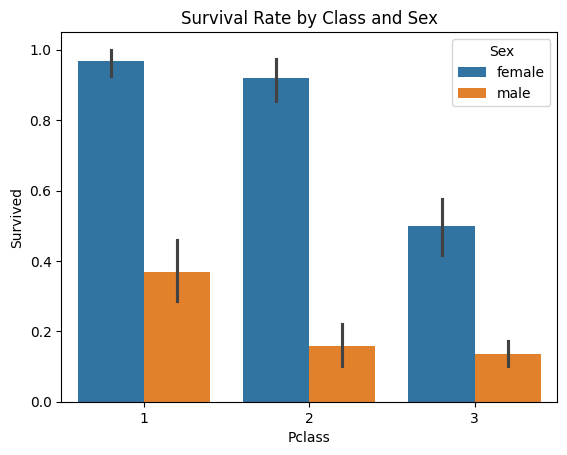

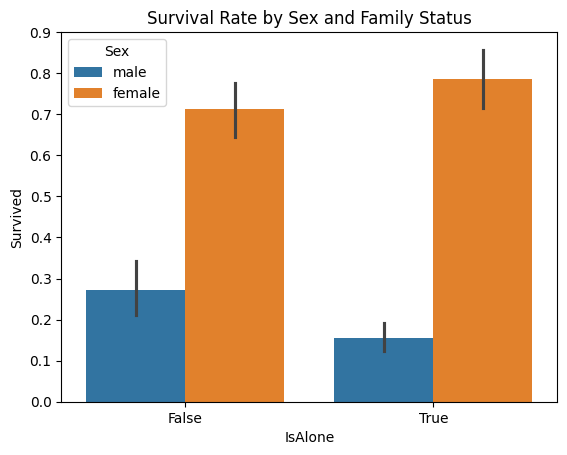

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df, 
    x="Pclass", 
    y="Survived", 
    hue="Sex"
)
plt.title("Survival Rate by Class and Sex")
plt.show()

sns.barplot(
    data=df, 
    x="IsAlone", 
    y="Survived", 
    hue="Sex"
)
plt.title("Survival Rate by Sex and Family Status")
plt.show()


**Challenge Analysis — Which features are most associated with survival?**

From the pivot table and plots, we observe that survival strongly depended on a combination of **Sex, Pclass, and IsAlone**:

- Female passengers had much higher survival rates than males across all classes.  
- Among women, those in **1st class** had the highest survival (>95%).  
- Male passengers in **3rd class** had the lowest survival (<15%).  
- Being **alone** further reduced the chance of survival, especially for males.  

**Conclusion**: The combination of **Sex + Pclass + IsAlone** shows the strongest association with survival on the Titanic.
